In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import scipy.stats as sts
from scipy.stats import sem

In [3]:
# Study data files
# path of the data sets
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results=mouse_metadata.merge(study_results, how='left', on='Mouse ID')

In [4]:
# Copy of the dataframe created
mousedata_study=mouse_metadata_study_results.copy()

# Renaming column 'Tumor Volume (mm3)' to 'Tumor_volume'
mousedata_study=mousedata_study.rename(columns={'Tumor Volume (mm3)':'Tumor_volume'})

# Display the data table for preview
mousedata_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
print("Number of mice: ", mousedata_study['Mouse ID'].count())

Number of mice:  1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_timepoint_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID', 'Timepoint'])]
mouseid_timepoint_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Get all the data for the duplicate mouse ID.
mouseid_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID'])]
mouseid_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_results=mousedata_study.drop_duplicates(['Mouse ID'], inplace=False)

In [9]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice after cleaning: ", cleaned_mouse_data_results['Mouse ID'].count())

# A copy of cleaned_mouse_data_results is created
cleaned_data_results=cleaned_mouse_data_results.copy()
cleaned_data_results

Number of mice after cleaning:  249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen=mousedata_study.groupby('Drug Regimen')

# tumor_volume=clean_study_results['Tumor_volume']

mean_tvolume=drug_regimen.Tumor_volume.mean()
# print("The mean of tumor volume: ", mean_tvolume)

median_tvolume=drug_regimen.Tumor_volume.median()
# print("The median of tumor volume: ", median_tvolume)

# mode_tvolume = drug_regimen.Tumor_volume.agg(pd.Series.mode)
# # print("The mode of tumor volume: ", mode_tvolume)

var_tvolume=drug_regimen.Tumor_volume.var()
# print("The variance of tumor volume: ", var_tvolume)

std_tvolume=drug_regimen.Tumor_volume.std()
# print("The standard deviation of tumor volume: ", std_tvolume)

sem_tvolume=drug_regimen.Tumor_volume.sem()
# print(sem_tvolume)

# Assemble the resulting series into a single summary dataframe.
agg_tumor_volume=pd.DataFrame({"Mean":mean_tvolume, "Median":median_tvolume, "Variance":var_tvolume,
                              "Standard Deviation":std_tvolume, "SEM":sem_tvolume})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_tumor_volume

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary=drug_regimen.agg({'Tumor_volume':['mean','median','var','std','sem']})
agg_summary = agg_summary.rename(columns={'Tumor_volume':''})
agg_summary

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<AxesSubplot:title={'center':'Drug Regimen Tests in Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

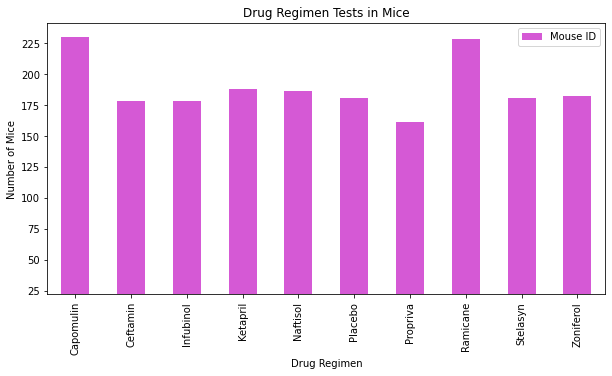

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# cleaned_data_results is the unique 'Mouse ID' dataframe used for grouping by drug regimen
drug_reg= mousedata_study.groupby('Drug Regimen')['Mouse ID'].count()
print(drug_reg)
drug_reg.plot(kind='bar', figsize=(10,5), title='Drug Regimen Tests in Mice', legend='best',
              xlabel='Drug Regimen', ylabel='Number of Mice', ylim=22, stacked=True, color='m', alpha=0.65)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


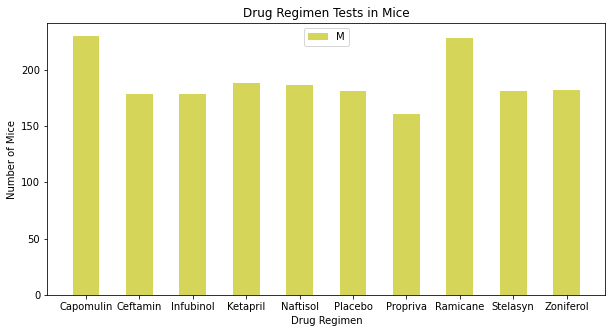

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# drug_reg dataframe is grouped one by 'Drug Regimen' and 'Mouse ID'
# Index values of drug_reg dataframe is stored in to a list
num_mice= drug_reg.index.tolist()
print(num_mice)

# Finding positions of drug_reg values 
pos=np.arange(len(num_mice))
# print(pos)

# The values of drug_reg dataframe stored as a list
x_axis=list(drug_reg)
print(x_axis)

# Figure size fixing
plt.figure(figsize=(10,5))

# Plotting figure
plt.bar(pos, x_axis, color='y', alpha=0.65, width=0.5)

# Using xticks positional values are assigning
plt.xticks(pos, num_mice)

# Titling the bar graph
plt.title('Drug Regimen Tests in Mice')

# Labeling x_axix
plt.xlabel("Drug Regimen")

# Labeling y_axis
plt.ylabel('Number of Mice')

# Printing legend
plt.legend('Mouse ID', loc=9)


array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

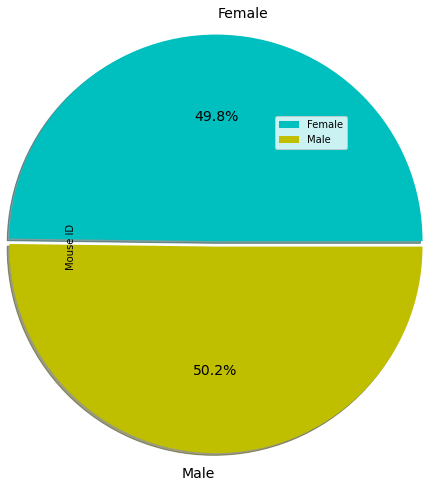

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ml_fl_mice = cleaned_data_results.groupby('Sex')['Mouse ID'].count()

colors=['c', 'y']

explode = (0.05,0)

legend='Mouse ID'

ml_fl_mice.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%1.1f%%', colors=colors,
               radius=1.9, explode=explode, fontsize=14, shadow=True, legend=1)

([<matplotlib.patches.Wedge at 0x25402f19490>,
 [Text(0.016969439434090898, 2.689946474955458, 'Male'),
  Text(-0.01665402234423823, -2.6399474698447616, 'Female')],
 [Text(0.00939942927761912, 1.4899703522987477, '49.8%'),
  Text(-0.009084012187766307, -1.4399713471880515, '50.2%')])

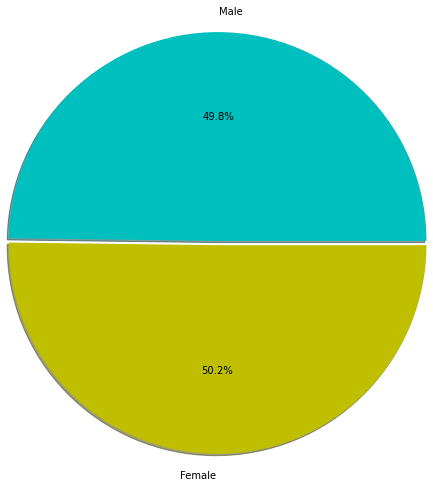

In [15]:
# Labels in a list
labels=['Male', 'Female']

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(ml_fl_mice, labels=labels, colors=colors, autopct="%1.1f%%", radius=2.4, explode=explode, 
       shadow=True)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse descending order
treatment_regimen1 = mousedata_study[['Mouse ID','Timepoint','Drug Regimen'
                                     ]].sort_values(by='Timepoint', ascending=False)
treatment_regimen1

# Start by getting the last tumor volume for each mouse by ascending order
treatment_regimen2 = mousedata_study[['Mouse ID','Tumor_volume']].sort_values(by='Tumor_volume')
treatment_regimen2

# Merging above two dataframe by 'Mouse ID'
treatment_regimen_with_dupli=treatment_regimen1.merge(treatment_regimen2, how='left', on='Mouse ID')

# Dropping duplicate rows by 'Mouse ID'
treatment_regimen=treatment_regimen_with_dupli.drop_duplicates(['Mouse ID'], inplace=False)
treatment_regimen

,Mouse ID,Timepoint,Drug Regimen,Tumor_volume
0,z969,45,Naftisol,45.000000
10,j119,45,Capomulin,38.125164
20,q787,45,Placebo,45.000000
30,d251,45,Ramicane,37.311236
40,q633,45,Zoniferol,45.000000
...,...,...,...,...
15695,t573,0,Ceftamin,45.000000
15775,u153,0,Ceftamin,45.000000
15838,v199,0,Naftisol,45.000000
16603,n482,0,Propriva,45.000000


    index Mouse ID  Timepoint Drug Regimen  Tumor_volume
0      10     j119         45    Capomulin     38.125164
1      50     l897         45    Capomulin     37.682767
2      70     b742         45    Capomulin     37.950355
3      90     b128         45    Capomulin     37.967644
4     150     v923         45    Capomulin     39.648296
5     170     g316         45    Capomulin     40.159220
6     190     s710         45    Capomulin     40.171920
7     210     l509         45    Capomulin     40.207289
8     230     r944         45    Capomulin     40.401765
9     290     g288         45    Capomulin     36.356851
10    300     y793         45    Capomulin     31.475411
11    330     r554         45    Capomulin     31.804841
12    340     m957         45    Capomulin     32.562839
13    380     t565         45    Capomulin     32.868916
14    460     i738         45    Capomulin     34.973438
15    500     w914         45    Capomulin     35.611309
16    860     i557         45  

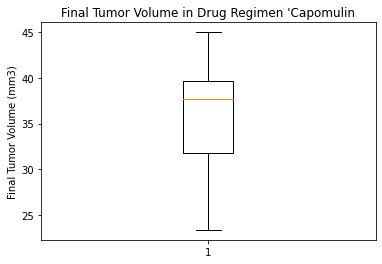

In [17]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# Extracting dataframe with drug regimen 'Capomulin'
capomulin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Capomulin'].reset_index()
print(capomulin_regimen)

# Sorting Tumor Volume and resetting index
capomulin_treatment=capomulin_regimen.Tumor_volume.sort_values()
print(capomulin_treatment)
    
quartiles = capomulin_treatment.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Capomulin")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capomulin_treatment)
plt.show()

15    22.050126
18    29.128472
17    30.276232
14    30.564625
16    30.638696
19    31.001861
2     31.095335
5     32.833189
6     32.978522
7     33.562402
8     34.671781
9     35.590254
10    36.003020
4     36.374510
20    36.561652
0     37.311236
21    37.753150
1     38.087373
3     40.659006
11    40.667713
12    41.395660
13    41.714619
22    42.655341
24    43.166373
23    44.183451
Name: Tumor_volume, dtype: float64
The lower quartile of tumor volume is: 31.09533505
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.56367122
The the median of tumor volume is: 36.00302016 
Values below 16.749828219999998 could be outliers.
Values above 55.0045131 could be outliers.


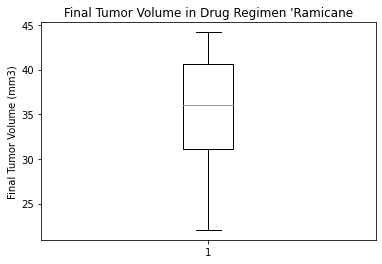

In [18]:
# Extracting dataframe with drug regimen 'Capomulin'
ramicane_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ramicane'].reset_index()
# print(capomulin_regimen)

# Sorting Tumor Volume and resetting index
ramicane_regimen=ramicane_regimen.Tumor_volume.sort_values()
print(ramicane_regimen)

quartiles = ramicane_regimen.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Ramicane")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ramicane_regimen)
plt.show()

23    36.321346
0     45.000000
22    45.000000
21    45.000000
20    45.000000
19    45.000000
18    45.000000
17    45.000000
16    45.000000
15    45.000000
14    45.000000
13    45.000000
12    45.000000
10    45.000000
9     45.000000
8     45.000000
7     45.000000
6     45.000000
5     45.000000
4     45.000000
3     45.000000
2     45.000000
1     45.000000
11    45.000000
24    45.000000
Name: Tumor_volume, dtype: float64
The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 0.0
The the median of tumor volume is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


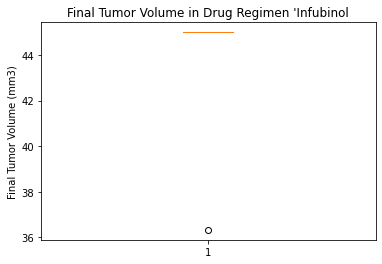

In [19]:
# Extracting dataframe with drug regimen 'Capomulin'
infubinol_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Infubinol'].reset_index()
# print(capomulin_regimen)

# Sorting Tumor Volume and resetting index
infubinol_regimen=infubinol_regimen.Tumor_volume.sort_values()
print(infubinol_regimen)

quartiles = infubinol_regimen.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Infubinol")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(infubinol_regimen)
plt.show()

0     45.0
22    45.0
21    45.0
20    45.0
19    45.0
18    45.0
17    45.0
16    45.0
15    45.0
14    45.0
13    45.0
23    45.0
12    45.0
10    45.0
9     45.0
8     45.0
7     45.0
6     45.0
5     45.0
4     45.0
3     45.0
2     45.0
1     45.0
11    45.0
24    45.0
Name: Tumor_volume, dtype: float64
The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 0.0
The the median of tumor volume is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


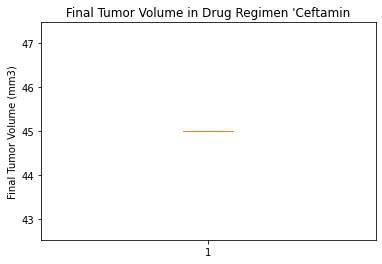

In [20]:
# Extracting dataframe with drug regimen 'Capomulin'
ceftamin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ceftamin'].reset_index()
# print(capomulin_regimen)

# Sorting Tumor Volume and resetting index
ceftamin_regimen=ceftamin_regimen.Tumor_volume.sort_values()
print(ceftamin_regimen)

quartiles = ceftamin_regimen.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Ceftamin")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ceftamin_regimen)
plt.show()

## Line and Scatter Plots

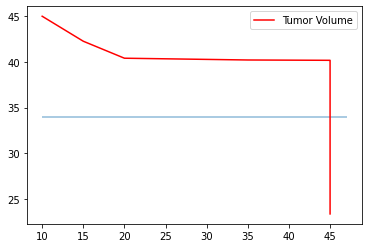

In [21]:
# Line plot Capomulin drug regimen with Timepoint and Tumor Volume
# Sorting values of tumor volume in the dataframe
tumor_vol=capomulin_treatment.sort_values()
# print(capo_x_axis)

# Creating a series of Timepoint of Capomulin
time_point=capomulin_regimen.Timepoint

# print(capo_timepoint)
plt.hlines(34,10,47,alpha=0.5)

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(time_point, tumor_vol, color='r', label='Tumor Volume')
plt.legend(loc="best")

In [27]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse_weight = mousedata_study[['Mouse ID','Drug Regimen', 'Weight (g)', 'Tumor_volume'
                                     ]].sort_values(by='Tumor_volume')
# Filtering dataframe by drug regiment 'Capomulin'
capo_mouse_weight=capo_mouse_weight.loc[capo_mouse_weight['Drug Regimen']=='Capomulin']

# Calculating average tumor volume by grouping 'Mouse ID' and Mouse weight and creating new dataframe
avg_tumor_vol=pd.DataFrame(capo_mouse_weight.groupby(['Mouse ID', 'Weight (g)'])['Tumor_volume'].mean().reset_index())

avg_tumor_vol

,Mouse ID,Weight (g),Tumor_volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


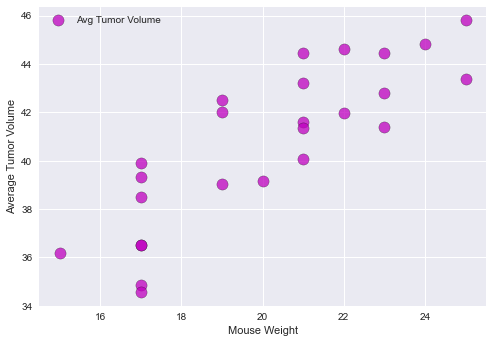

In [28]:

plt.style.use('seaborn')
plt.title="Average Tumor volume Vs Mouse weight"
fig, ax = plt.subplots()
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

# Matplotlib scatter plot for mouse weight with average tumor volume
plt.scatter(avg_tumor_vol.iloc[:,1], avg_tumor_vol.iloc[:, 2], marker='o', 
            edgecolor='black', s=125, alpha=0.75, c ='m', label="Avg Tumor Volume")

ax.legend(loc="best")
ax.grid(True)
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_wt=avg_tumor_vol.loc[:,'Weight (g)']
tumor_vl=avg_tumor_vol.loc[:,'Tumor_volume']

# Pearson correlation coefficient for mouse weight and average tumor volume
correlation = sts.pearsonr(mouse_wt, tumor_vl)
print(f'Correlation coefficient for mouse weigt and average tumor volume: {round(correlation[0],4)}')


Correlation coefficient for mouse weigt and average tumor volume: 0.8419
